## Importing Libraries

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns

## Investigating the Dataset

#### Reading the file

In [36]:
ds = pd.read_csv('survey.csv')
ds.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


#### Renaming columns

In [37]:
ds.rename(columns = {"benefits":"mental_health_benefits", "leave": "medical_leave", "coworkers": "inform_coworkers", "supervisor": "discuss_supervisor", "obs_consequence": "observed_neg_consequence"}, inplace = True) 
ds.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,medical_leave,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### Number of NaNs in the dataset

In [38]:
ds.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
mental_health_benefits          0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
medical_leave                   0
mental_health_consequence       0
phys_health_consequence         0
inform_coworkers                0
discuss_supervisor              0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
observed_neg_consequence        0
comments                     1095
dtype: int64

#### Replacing NaNs in work_interfere

In [39]:
# Since the NaNs form 20% of the work_interfere column, they will be replaced with "Unknown"
ds[["work_interfere"]] = ds[["work_interfere"]].fillna("Unknown")
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,medical_leave,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,Unknown,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Unknown,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


#### The amount of items in the dataset

In [40]:
ds.size

33993

#### The shape of the dataset

In [41]:
ds.shape
# There are 1,259 rows and 27 columns

(1259, 27)

In [42]:
ds.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'mental_health_benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'medical_leave',
       'mental_health_consequence', 'phys_health_consequence',
       'inform_coworkers', 'discuss_supervisor', 'mental_health_interview',
       'phys_health_interview', 'mental_vs_physical',
       'observed_neg_consequence', 'comments'],
      dtype='object')

#### Looking at unique values of every items

In [43]:
for col in ds.columns:
    print(ds[col].unique())

['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' '

In [44]:
# Due to Gender being so many items, the items will be replaced with:
# 1. Female
# 2. Male
# 3. Other

# Anything that is neither Male nor Female, will be replaced with Other.

In [45]:
ds["Gender"] = ds["Gender"].replace({'M':'Male','male':'Male','female':'Female','m':'Male','Male-ish':'Other','maile':'Male','Trans-female':'Other',
'Cis Female':'Female','F':'Female','something kinda male?':'Other','Cis Male':'Male','Woman':'Female','f':'Female','Mal':'Male',
'Male (CIS)':'Male','queer/she/they':'Other','non-binary':'Other','Femake':'Female','woman':'Female','Make':'Male','Nah':'Other',
'All':'Other','Enby':'Other','fluid':'Other','Genderqueer':'Other','Female ':'Female','Androgyne':'Other','Agender':'Other',
'cis-female/femme':'Female','Guy (-ish) ^_^':'Other','male leaning androgynous':'Other','Male ':'Male',
'Man':'Male','Trans woman':'Other','msle':'Other','Neuter':'Other','Female (trans)':'Other','queer':'Other',
'Female (cis)':'Female','Mail':'Male','cis male':'Male','A little about you':'Other','Malr':'Male','p':'Other','femail':'Female',
'Cis Man':'Male','ostensibly male, unsure what that really means':'Other'})

In [46]:
ds.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,medical_leave,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### Available data per country

In [47]:
ds_country = ds.groupby(['Country']).size()
ds_country

# Since the data is mostly coming from the US, the study will focus on the results obtained in the US.

Country
Australia                  21
Austria                     3
Bahamas, The                1
Belgium                     6
Bosnia and Herzegovina      1
Brazil                      6
Bulgaria                    4
Canada                     72
China                       1
Colombia                    2
Costa Rica                  1
Croatia                     2
Czech Republic              1
Denmark                     2
Finland                     3
France                     13
Georgia                     1
Germany                    45
Greece                      2
Hungary                     1
India                      10
Ireland                    27
Israel                      5
Italy                       7
Japan                       1
Latvia                      1
Mexico                      3
Moldova                     1
Netherlands                27
New Zealand                 8
Nigeria                     1
Norway                      1
Philippines                 1
Po

## Research Questions 

#### 1. How many people working for a Tech company have mental health issues in the US?
#### 2. How is the distribution per State in the US?
#### 3. How is the distribution in gender for mental health in tech in the US?
#### 4. What is the influence of working remotely on the mental health of people working in Tech in the US?
#### 5. What is the influence of any family members with mental health issues on the mental health of people working in Tech in the US?

## Definitions

#### 1. Mental Illness

In [48]:
# To decide which persons will be classified as persons with a mental illness, the following definition will be handled:
# 1. The person has received treatment for a mental illness
# 2. The person has mentioned that his/hers mental illness has interfered Often, Sometimes or Unknown with his/her work.

#### Defining which persons have a mental illness

In [49]:
# Adding the mental_ill column
ds["mental_ill"]= (ds ['treatment' ] == 'Yes' ) | (ds ['work_interfere' ] == "Often" ) | (ds ['work_interfere' ] == "Sometimes") | (ds ['work_interfere' ] == "Unknown")
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence,comments,mental_ill
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,True
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,False
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,False
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,True
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,Unknown,26-100,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,True
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,True
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,True
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,Unknown,100-500,...,Yes,No,No,No,No,No,No,No,NaN,True


### How many people in Tech have mental health issues in the US?

In [50]:
ds_us = ds[["Country","state","mental_ill", "tech_company"]]
ds_us.head(50)

filter = (ds ['Country'] == "United States" ) & (ds ['tech_company'] == "Yes")
ds_us_tech = ds_us[filter]
ds_us_tech.head()

,Country,state,mental_ill,tech_company
0,United States,IL,True,Yes
4,United States,TX,False,Yes
5,United States,TN,True,Yes
6,United States,MI,True,Yes
8,United States,IL,True,Yes


In [51]:
ds_mental = ds_us_tech[['Country', 'tech_company', 'mental_ill']].groupby(['Country','mental_ill','tech_company']).size().reset_index()
ds_mental

ds_mental.columns = ['Country', 'mental_ill', 'tech_company', 'amount_mental_ill']
ds_mental

,Country,mental_ill,tech_company,amount_mental_ill
0,United States,False,Yes,108
1,United States,True,Yes,503


In [52]:
ds_mental_1 = ds_us_tech[['Country', 'state', 'tech_company', 'mental_ill']].groupby(['Country','state','mental_ill','tech_company']).size().reset_index()
ds_mental_1

ds_mental_1.columns = ['Country', 'state', 'mental_ill', 'tech_company', 'amount_mental_ill']
ds_mental_1

ds_mental_1.sort_values('amount_mental_ill', ascending=False)
ds_mental_1

,Country,state,mental_ill,tech_company,amount_mental_ill
0,United States,AL,False,Yes,1
1,United States,AL,True,Yes,4
2,United States,AZ,True,Yes,6
3,United States,CA,False,Yes,17
4,United States,CA,True,Yes,113
...,...,...,...,...,...
64,United States,VT,True,Yes,1
65,United States,WA,False,Yes,9
66,United States,WA,True,Yes,53
67,United States,WI,True,Yes,7


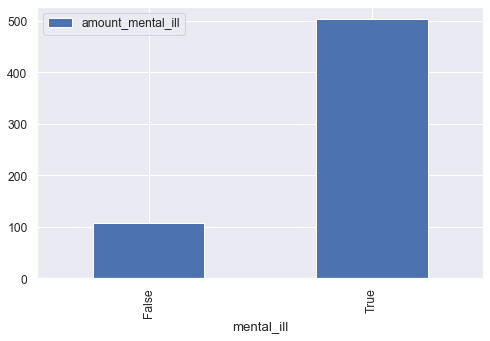

In [53]:
import matplotlib.pyplot as plt 

ds_mental.plot.bar(x ="mental_ill", y ="amount_mental_ill", figsize= (8,5))

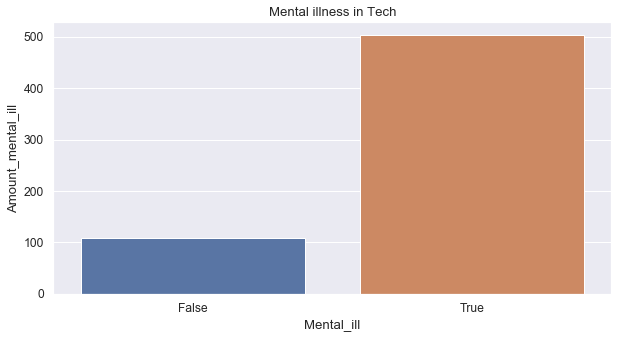

In [54]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.set(font_scale=1.1)
sns.barplot(x="mental_ill", y="amount_mental_ill", data= ds_mental)

plt.xlabel("Mental_ill")
plt.ylabel("Amount_mental_ill")
plt.title ("Mental illness in Tech")
plt.savefig('Amount_mental_ill.png', bbox_inches = 'tight', transparent = True)

### How is the distribution per State in the US?

In [55]:
ds_us_state = ds_us_tech[['state', 'mental_ill']].groupby(['state','mental_ill']).size().reset_index()
ds_us_state

ds_us_state.columns = ['state', 'mental_ill','amount_mental_ill']
ds_us_state

ds_us_state.loc[ds_us_state["mental_ill"] == True, "amount_mental_ill"].sum()

495

In [56]:
filter = (ds_us_state['mental_ill'] == True) 
ds_state_mental = ds_us_state[filter]
ds_state_mental

,state,mental_ill,amount_mental_ill
1,AL,True,4
2,AZ,True,6
4,CA,True,113
6,CO,True,5
8,CT,True,2
9,DC,True,3
11,FL,True,9
13,GA,True,4
14,IA,True,2
15,ID,True,1


In [57]:
ds_state_mental = ds_state_mental.sort_values('amount_mental_ill', ascending=False)
ds_state_mental

,state,mental_ill,amount_mental_ill
4,CA,True,113
66,WA,True,53
44,NY,True,40
59,TX,True,31
57,TN,True,26
46,OH,True,24
49,OR,True,23
19,IN,True,16
51,PA,True,16
29,MI,True,14


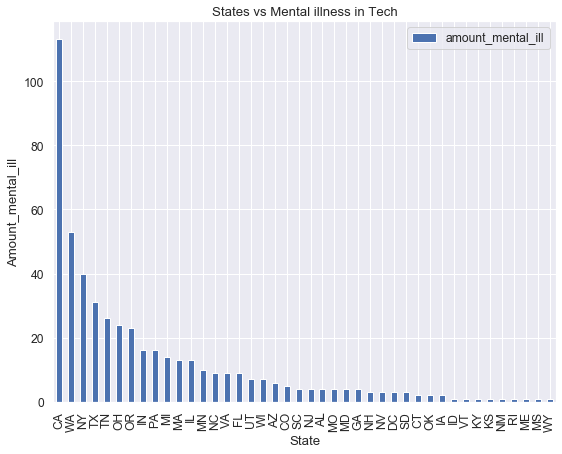

In [58]:
ds_state_mental.plot.bar(x ="state", y ="amount_mental_ill", figsize= (9,7))

plt.xlabel("State")
plt.ylabel("Amount_mental_ill")
plt.title ("States vs Mental illness in Tech")
plt.savefig('State_mental_ill.png', bbox_inches = 'tight', transparent = True)

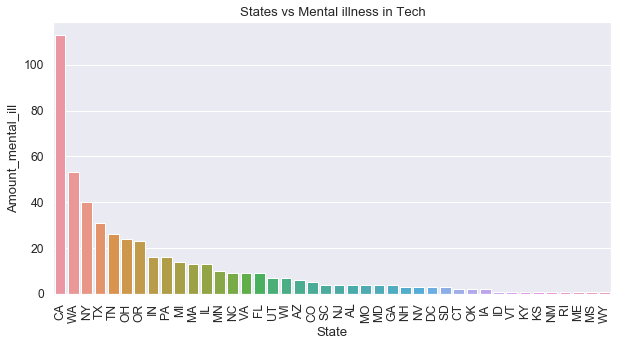

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.set(font_scale=1.1)
sns.barplot(x="state", y="amount_mental_ill", data= ds_state_mental)

plt.xlabel("State")
plt.ylabel("Amount_mental_ill")
plt.title ("States vs Mental illness in Tech")
plt.xticks(rotation=90)
plt.savefig('State_mental_ill_2.png', bbox_inches = 'tight', transparent = True)

### How is the distribution in gender for mental health in tech in the US?

In [60]:
ds_gender = ds[['Country', 'Gender', 'mental_ill', 'tech_company']].groupby(['Country','Gender','mental_ill','tech_company']).size().reset_index()
ds_gender

,Country,Gender,mental_ill,tech_company,0
0,Australia,Female,False,No,1
1,Australia,Female,True,No,2
2,Australia,Female,True,Yes,2
3,Australia,Male,False,Yes,2
4,Australia,Male,True,No,1
...,...,...,...,...,...
121,United States,Other,False,Yes,2
122,United States,Other,True,No,2
123,United States,Other,True,Yes,7
124,Uruguay,Male,True,Yes,1


In [61]:
filter = (ds_gender['Country'] == 'United States') & (ds_gender['tech_company'] == 'Yes') 
ds_gender_us = ds_gender[filter]
ds_gender_us

ds_gender_us.columns = ['Country', 'Gender','mental_ill', 'tech_company', 'amount_mental_ill']
ds_gender_us

,Country,Gender,mental_ill,tech_company,amount_mental_ill
114,United States,Female,False,Yes,11
116,United States,Female,True,Yes,129
118,United States,Male,False,Yes,95
120,United States,Male,True,Yes,367
121,United States,Other,False,Yes,2
123,United States,Other,True,Yes,7


In [62]:
filter = (ds_gender['Country'] == 'United States') & (ds_gender['Gender'] == 'Female') & (ds_gender['tech_company'] == 'Yes') 
ds_gender_fem = ds_gender[filter]
ds_gender_fem

ds_gender_fem.columns = ['Country', 'Gender','mental_ill', 'tech_company', 'amount_mental_ill']
ds_gender_fem

,Country,Gender,mental_ill,tech_company,amount_mental_ill
114,United States,Female,False,Yes,11
116,United States,Female,True,Yes,129


In [63]:
ds_gender_fem["Percentage_ill"] = round(((ds_gender_fem['amount_mental_ill']/140) * 100),2)
ds_gender_fem

/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Gender,mental_ill,tech_company,amount_mental_ill,Percentage_ill
114,United States,Female,False,Yes,11,7.86
116,United States,Female,True,Yes,129,92.14


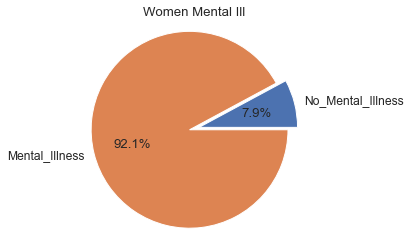

In [95]:
labels = ['No_Mental_Illness', 'Mental_Illness']
sizes = [7.86, 92.14]

explode = (0.1, 0)
plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.savefig('Mental_ill_fem.png', bbox_inches = 'tight', transparent = True)
plt.title ("Women Mental Ill")
plt.show()

In [65]:
filter = (ds_gender['Country'] == 'United States') & (ds_gender['Gender'] == 'Male') & (ds_gender['tech_company'] == 'Yes') 
ds_gender_male = ds_gender[filter]
ds_gender_male

ds_gender_male.columns = ['Country', 'Gender','mental_ill', 'tech_company', 'amount_mental_ill']
ds_gender_male

,Country,Gender,mental_ill,tech_company,amount_mental_ill
118,United States,Male,False,Yes,95
120,United States,Male,True,Yes,367


In [66]:
ds_gender_male["Percentage_ill"] = round(((ds_gender_male['amount_mental_ill']/462) * 100),2)
ds_gender_male

/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Gender,mental_ill,tech_company,amount_mental_ill,Percentage_ill
118,United States,Male,False,Yes,95,20.56
120,United States,Male,True,Yes,367,79.44


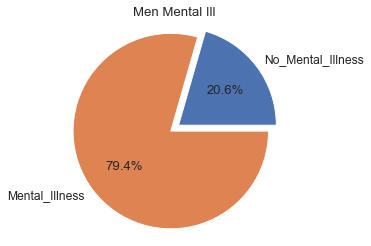

In [96]:
labels = ['No_Mental_Illness', 'Mental_Illness']
sizes = [20.56, 79.44]

explode = (0.1, 0)
plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.savefig('Mental_ill_male.png',bbox_inches = 'tight', transparent = True)
plt.title("Men Mental Ill")
plt.show()

In [68]:
filter = (ds_gender['Country'] == 'United States') & (ds_gender['Gender'] == 'Other') & (ds_gender['tech_company'] == 'Yes') 
ds_gender_other = ds_gender[filter]
ds_gender_other

ds_gender_other.columns = ['Country', 'Gender','mental_ill', 'tech_company', 'amount_mental_ill']
ds_gender_other

,Country,Gender,mental_ill,tech_company,amount_mental_ill
121,United States,Other,False,Yes,2
123,United States,Other,True,Yes,7


In [69]:
ds_gender_other["Percentage_ill"] = round(((ds_gender_other['amount_mental_ill']/9) * 100),2)
ds_gender_other

/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Gender,mental_ill,tech_company,amount_mental_ill,Percentage_ill
121,United States,Other,False,Yes,2,22.22
123,United States,Other,True,Yes,7,77.78


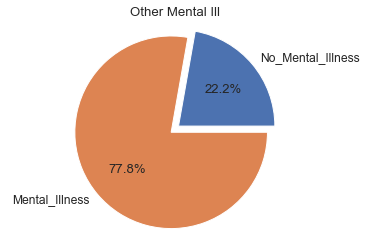

In [97]:
labels = ['No_Mental_Illness', 'Mental_Illness']
sizes = [22.22, 77.78]

explode = (0.1, 0)
plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.savefig('Mental_ill_other.png',bbox_inches = 'tight', transparent = True)
plt.title("Other Mental Ill")
plt.show()

### What is the influence of working remotely and family history on the mental health of people working in Tech in the US?

In [71]:
ds_corr = ds[["Country","mental_ill", "tech_company",'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'mental_health_benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'medical_leave',
       'mental_health_consequence', 'phys_health_consequence',
       'inform_coworkers', 'discuss_supervisor', 'mental_health_interview',
       'phys_health_interview', 'mental_vs_physical',
       'observed_neg_consequence']]
ds_corr

,Country,mental_ill,tech_company,Age,Gender,Country,state,self_employed,family_history,treatment,...,anonymity,medical_leave,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence
0,United States,True,Yes,37,Female,United States,IL,NaN,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,United States,False,No,44,Male,United States,IN,NaN,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,Canada,False,Yes,32,Male,Canada,NaN,NaN,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,United Kingdom,True,Yes,31,Male,United Kingdom,NaN,NaN,Yes,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,United States,False,Yes,31,Male,United States,TX,NaN,No,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,United Kingdom,True,Yes,26,Male,United Kingdom,NaN,No,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,United States,True,Yes,32,Male,United States,IL,No,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,United States,True,Yes,34,Male,United States,CA,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,United States,True,Yes,46,Female,United States,NC,No,No,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [72]:
ds["family_history"] = ds["family_history"].replace({'Yes':'1','No':'0'})
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence,comments,mental_ill
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,0,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,True
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,0,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,False
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,0,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,False
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,1,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,True
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,0,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,0,Yes,Unknown,26-100,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,True
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,1,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,True
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,1,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,True
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,0,No,Unknown,100-500,...,Yes,No,No,No,No,No,No,No,NaN,True


In [73]:
ds["remote_work"] = ds["remote_work"].replace({'Yes':'1','No':'0'})
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence,comments,mental_ill
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,0,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,True
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,0,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,False
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,0,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,False
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,1,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,True
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,0,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,0,Yes,Unknown,26-100,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,True
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,1,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,True
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,1,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,True
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,0,No,Unknown,100-500,...,Yes,No,No,No,No,No,No,No,NaN,True


In [74]:
ds = ds.astype({"remote_work": int, "family_history": int})
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,inform_coworkers,discuss_supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,observed_neg_consequence,comments,mental_ill
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,0,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,True
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,0,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,False
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,0,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,False
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,1,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,True
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,0,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,0,Yes,Unknown,26-100,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,True
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,1,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,True
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,1,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,True
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,0,No,Unknown,100-500,...,Yes,No,No,No,No,No,No,No,NaN,True


In [75]:
ds["mental_ill"].corr(ds["remote_work"])

0.026251664061465424

In [76]:
ds["mental_ill"].corr(ds["family_history"])

0.23202256045662667

In [100]:
df_corr = ds[["mental_ill","family_history","remote_work"]]
df_corr

,mental_ill,family_history,remote_work
0,True,0,0
1,False,0,0
2,False,0,0
3,True,1,0
4,False,0,1
...,...,...,...
1254,True,0,0
1255,True,1,1
1256,True,1,0
1257,True,0,1


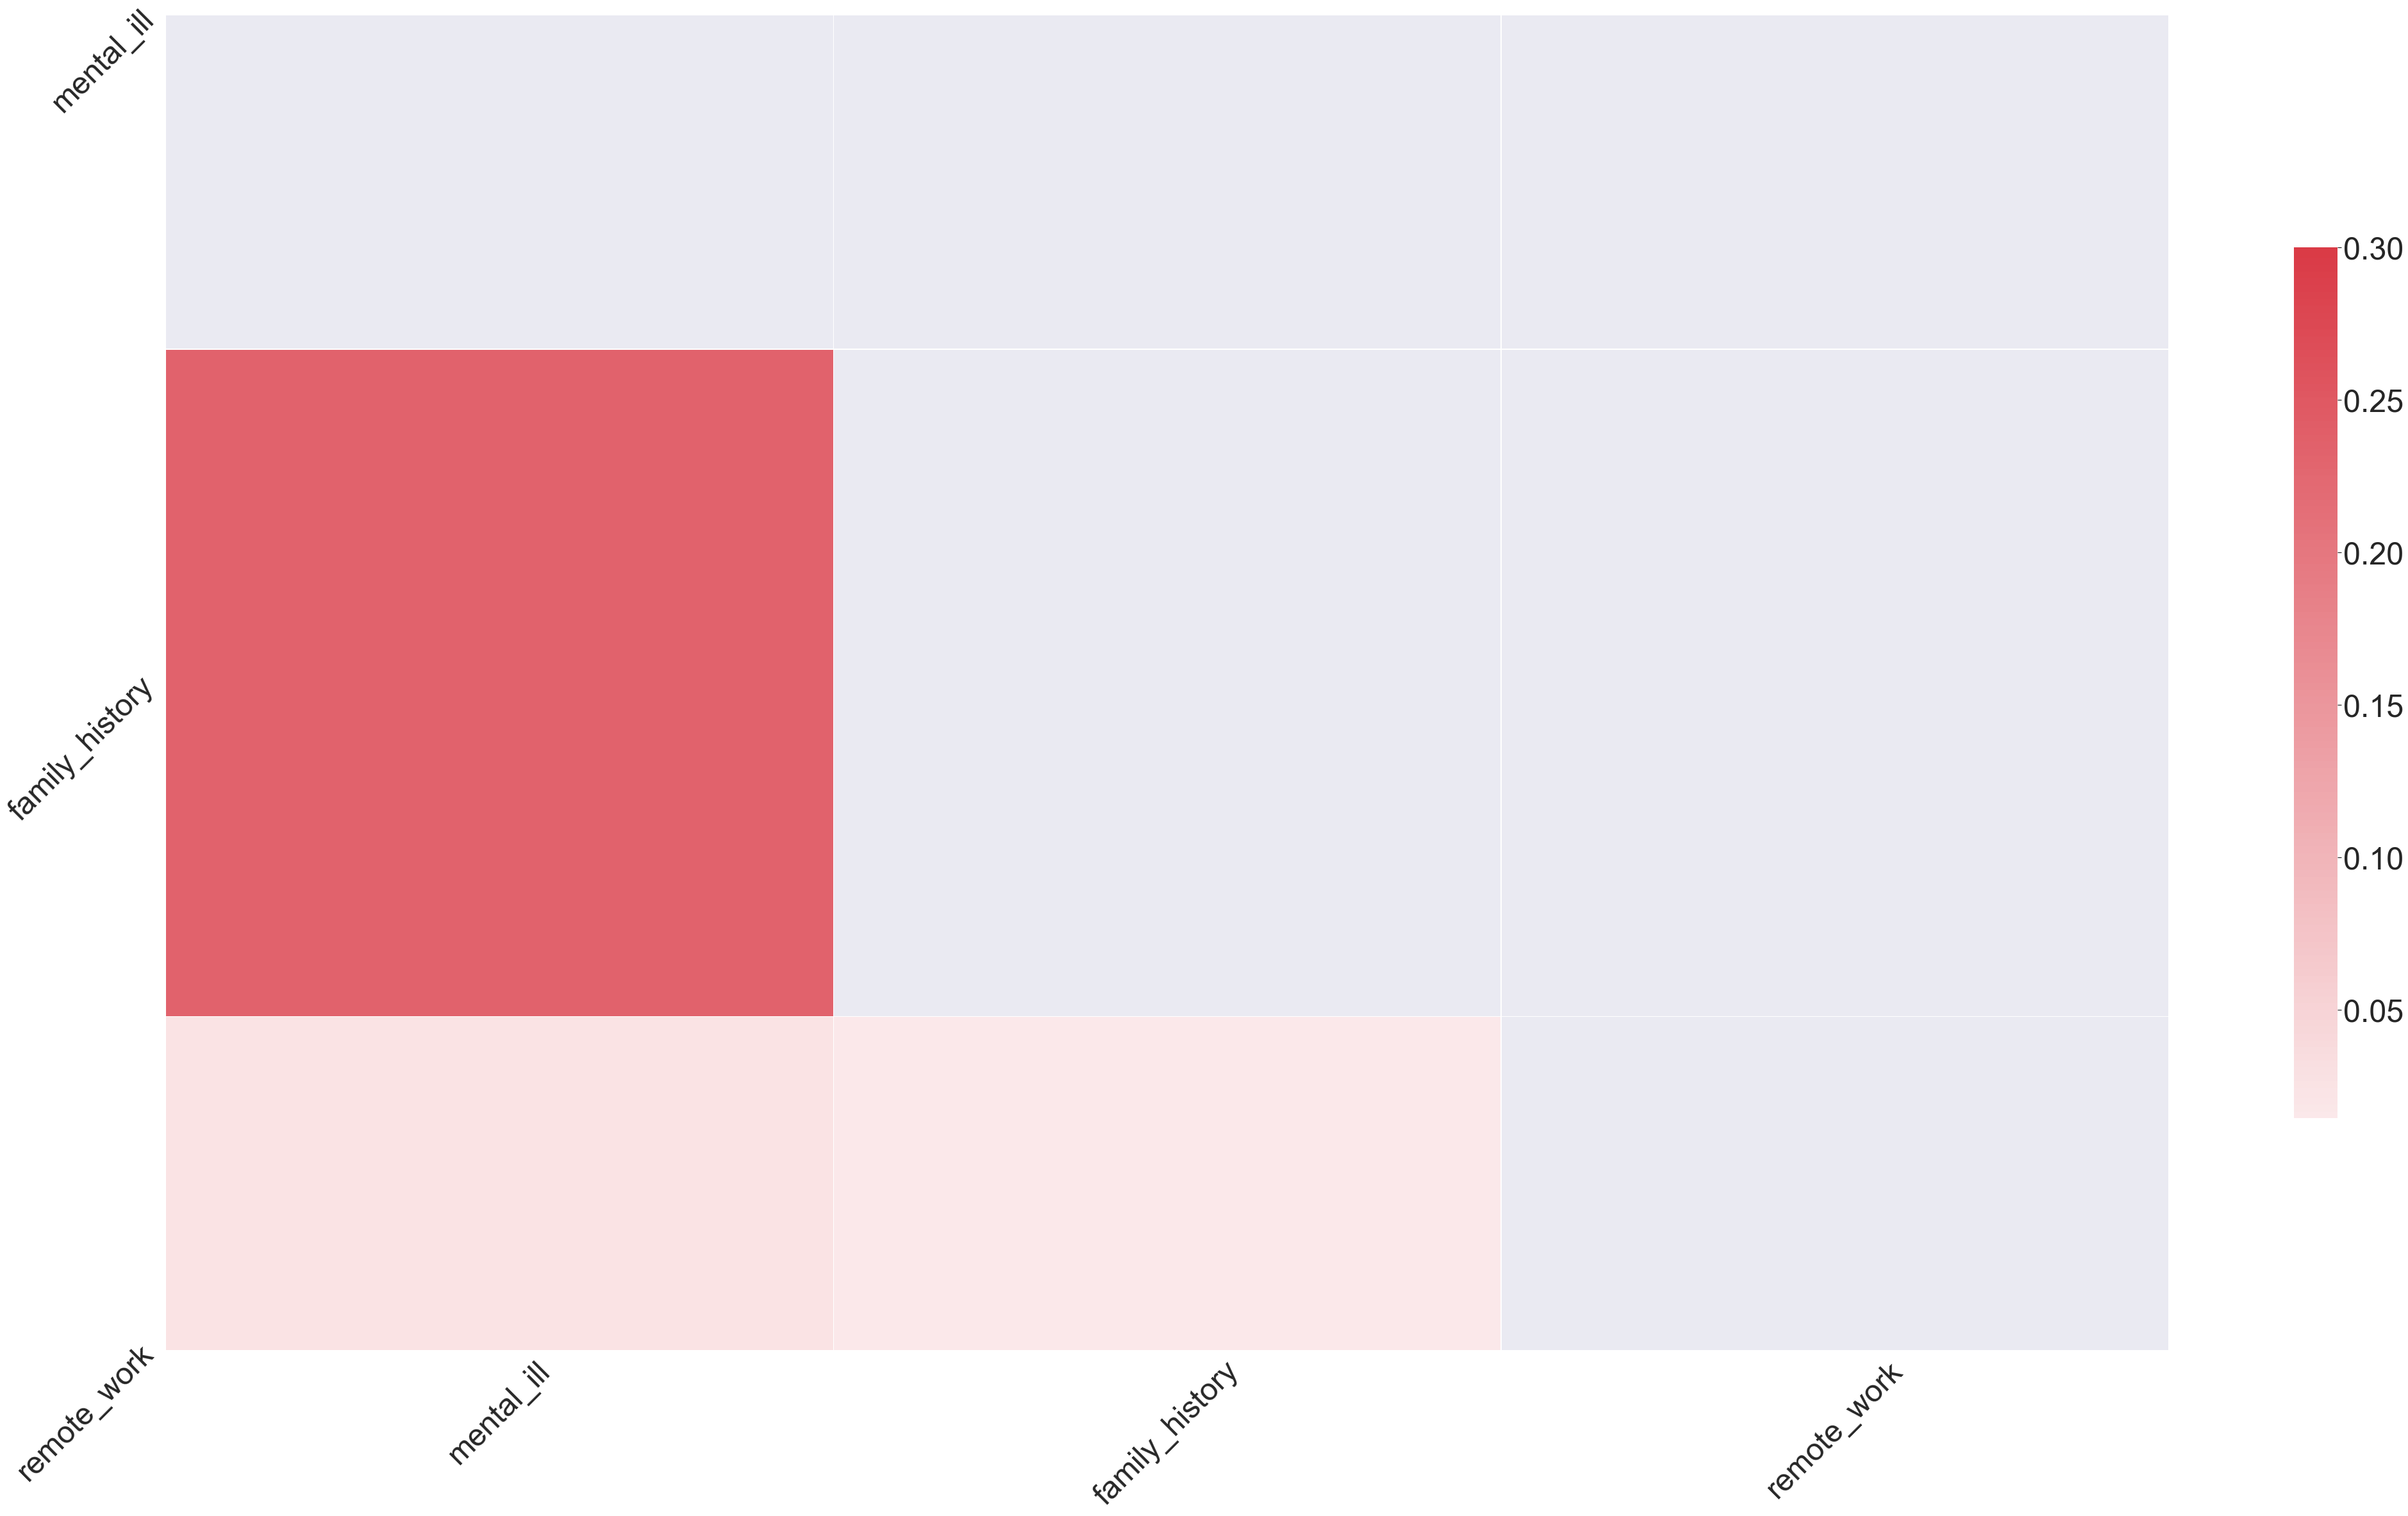

In [102]:
sns.set(font_scale=4.4)
corr = df_corr.corr()

# Generate a mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(70, 50))
plt.yticks(rotation=45)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=45)
plt.xticks(rotation=45)

plt.savefig('Correlations_big.png', bbox_inches = 'tight', transparent = True)

In [226]:
ds_remote = ds_corr.groupby(['mental_ill','remote_work']).size().reset_index()
ds_remote.columns = ['mental_ill', 'remote_work', 'mental_ill_amount']
ds_remote

,mental_ill,remote_work,mental_ill_amount
0,False,No,170
1,False,Yes,64
2,True,No,713
3,True,Yes,312


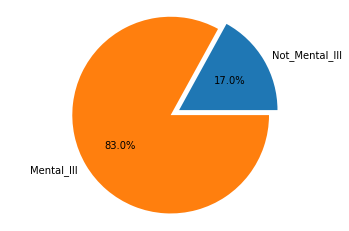

In [225]:
labels = ['Not_Mental_Ill', 'Mental_Ill']
sizes = [17, 83]

explode = (0.1, 0)
plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

In [227]:
ds_family = ds_corr.groupby(['mental_ill','family_history']).size().reset_index()
ds_family.columns = ['mental_ill', 'family_history', 'mental_ill_amount']
ds_family

,mental_ill,family_history,mental_ill_amount
0,False,No,198
1,False,Yes,36
2,True,No,569
3,True,Yes,456


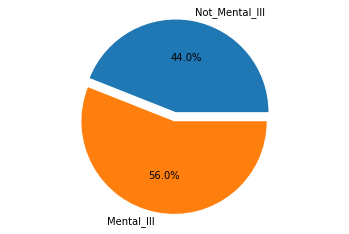

In [228]:
labels = ['Not_Mental_Ill', 'Mental_Ill']
sizes = [44, 56]

explode = (0.1, 0)
plt.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.show()